# About 시각화

- https://matplotlib.org/stable/index.html -> Example에서 원하는 plot 찾기
- `import matplotlib.pyplot as plt`
- 도화지 생성
- DATA
- 꾸밀 내용
- 보여주기 명령

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Line Plot

In [70]:
df_kospi=pd.read_csv("./Data/KOSPI.csv",index_col=0,header=0)
df_kospi

,Close
Date,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31
...,...
2021-12-13,3001.66
2021-12-14,2987.95
2021-12-15,2989.39


<Figure size 2200x1500 with 0 Axes>

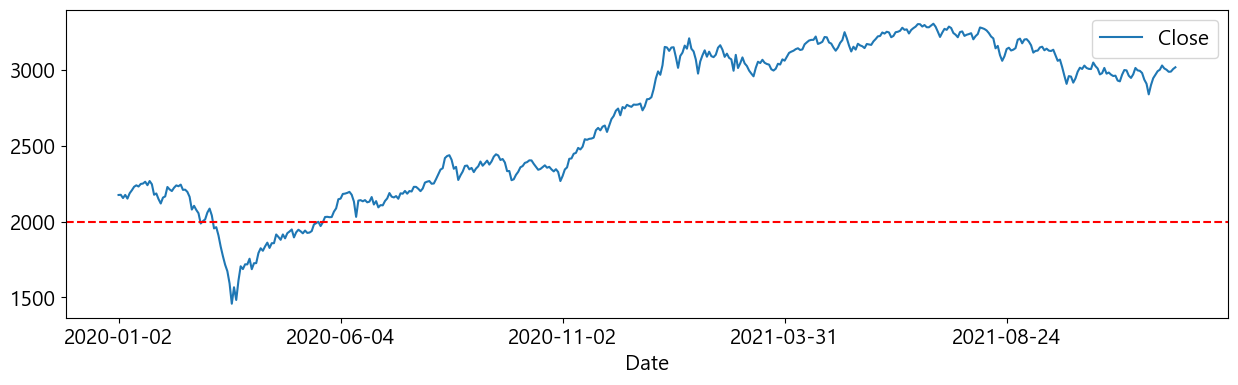

In [71]:
plt.figure() # 도화지를 생성
df_kospi.plot(figsize=(15,4))

plt.axhline(2000, linestyle= '--', color='red')
plt.show()

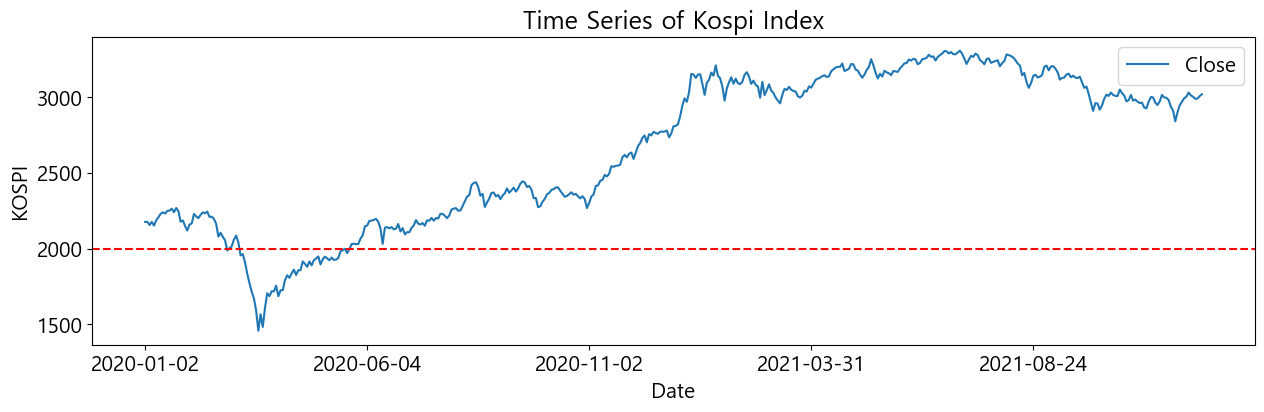

In [72]:
fig, ax = plt.subplots() # 도화지를 ax가 의미한다!

df_kospi.plot(kind = 'line', ax= ax, figsize=(15,4))
ax.axhline(2000, linestyle = '--', color = 'red')
ax.set(xlabel='Date', ylabel='KOSPI', title='Time Series of Kospi Index')
plt.show()

## 두개 이상의 그래프

In [73]:
df_samsung = pd.read_excel('./Data/samsung_naver_excel.xlsx', sheet_name=0, index_col = 'Date')
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


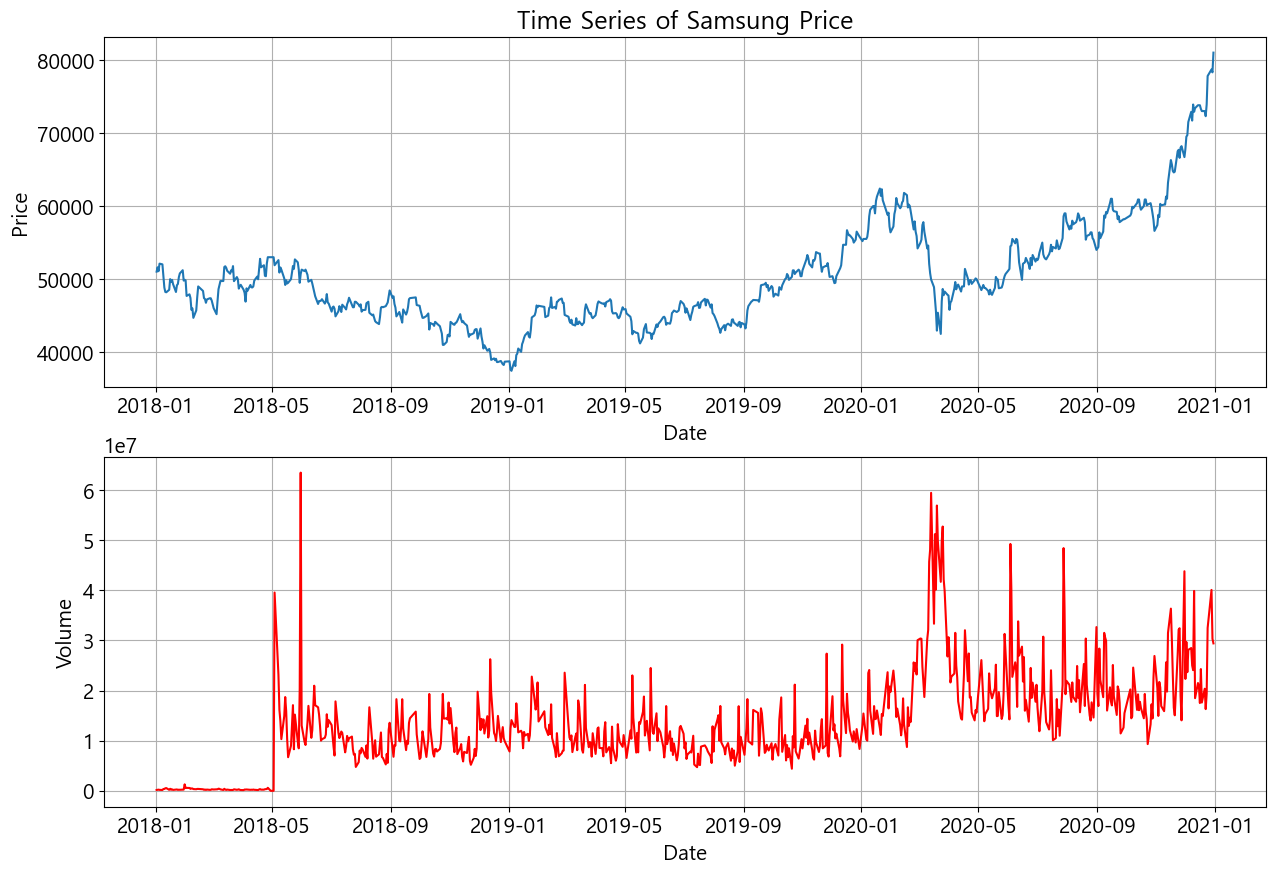

In [74]:
fig,axs = plt.subplots(2,1, figsize = (15,10)) # 2,1로 subplots를 그리겠다 -> 도화지의 영역을 2행 1열로 나눈 것!
axs[0].plot(df_samsung['Close'])
axs[0].grid(True)
axs[0].set(xlabel = 'Date', ylabel = 'Price', title='Time Series of Samsung Price')

axs[1].plot(df_samsung['Volume'], color = 'red')
axs[1].grid(True)
axs[1].set(xlabel = 'Date', ylabel = 'Volume')

plt.show()



[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Volume')]

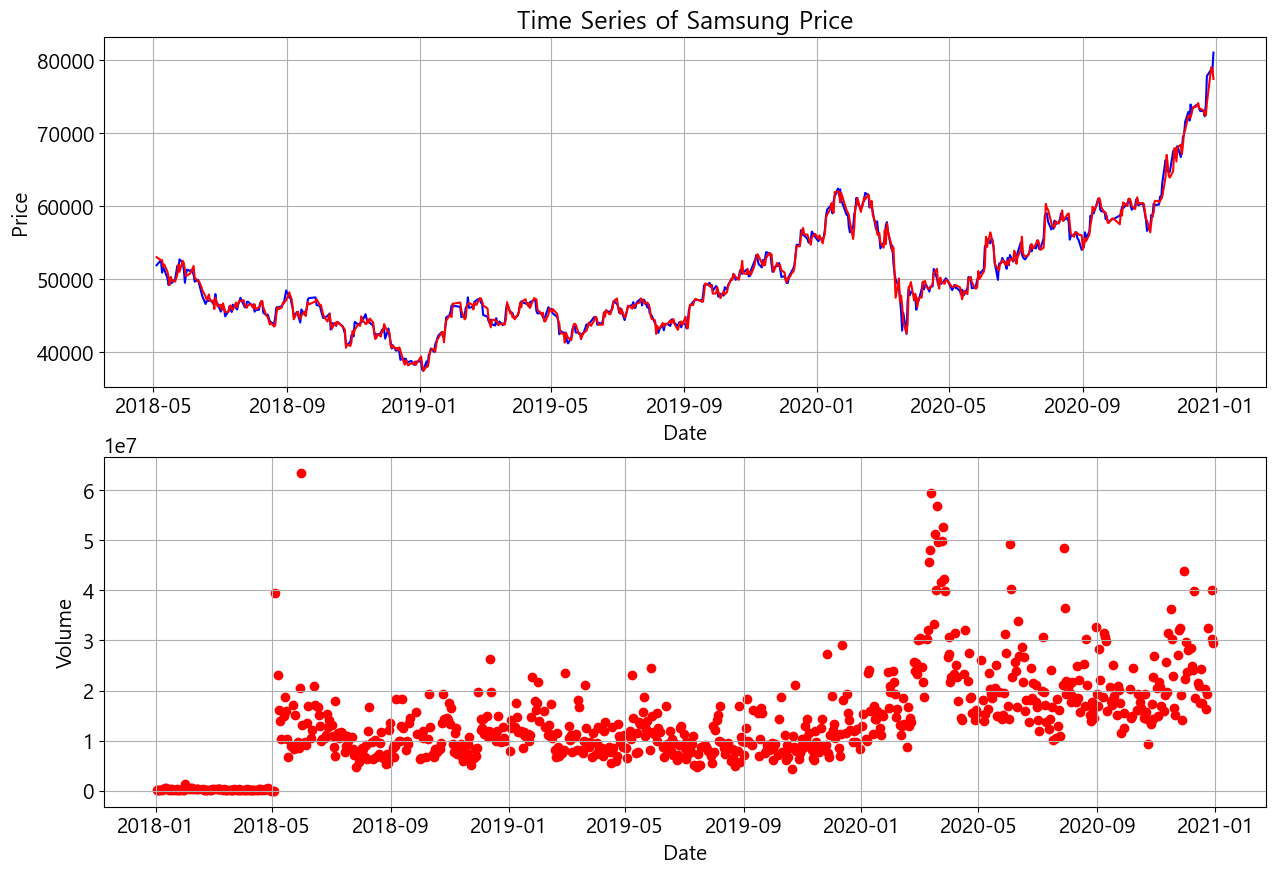

In [75]:
fig, axs = plt.subplots(2,1, figsize = (15,10))

axs[0].plot(df_samsung['Close']['2018-05-04':], color = 'blue')

axs[0].grid(True)

axs[0].set(xlabel = "Date", ylabel = 'Price', title = 'Time Series of Samsung Price')

axs[0].plot(df_samsung['Open']['2018-05-04':], color = 'red')

axs[1].scatter(df_samsung.index, df_samsung['Volume'], color = 'red')

axs[1].grid(True)

axs[1].set(xlabel = "Date", ylabel = 'Volume')



## Option

In [76]:
plt.rcParams["figure.figsize"] = (22,15)
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams["font.size"] = 15
plt.rc('axes', unicode_minus = False)

In [77]:
df=pd.read_excel('./Data/samsung_kospi_excel.xlsx', sheet_name=0, index_col='Date')
df = df.loc['2018-01-01':]

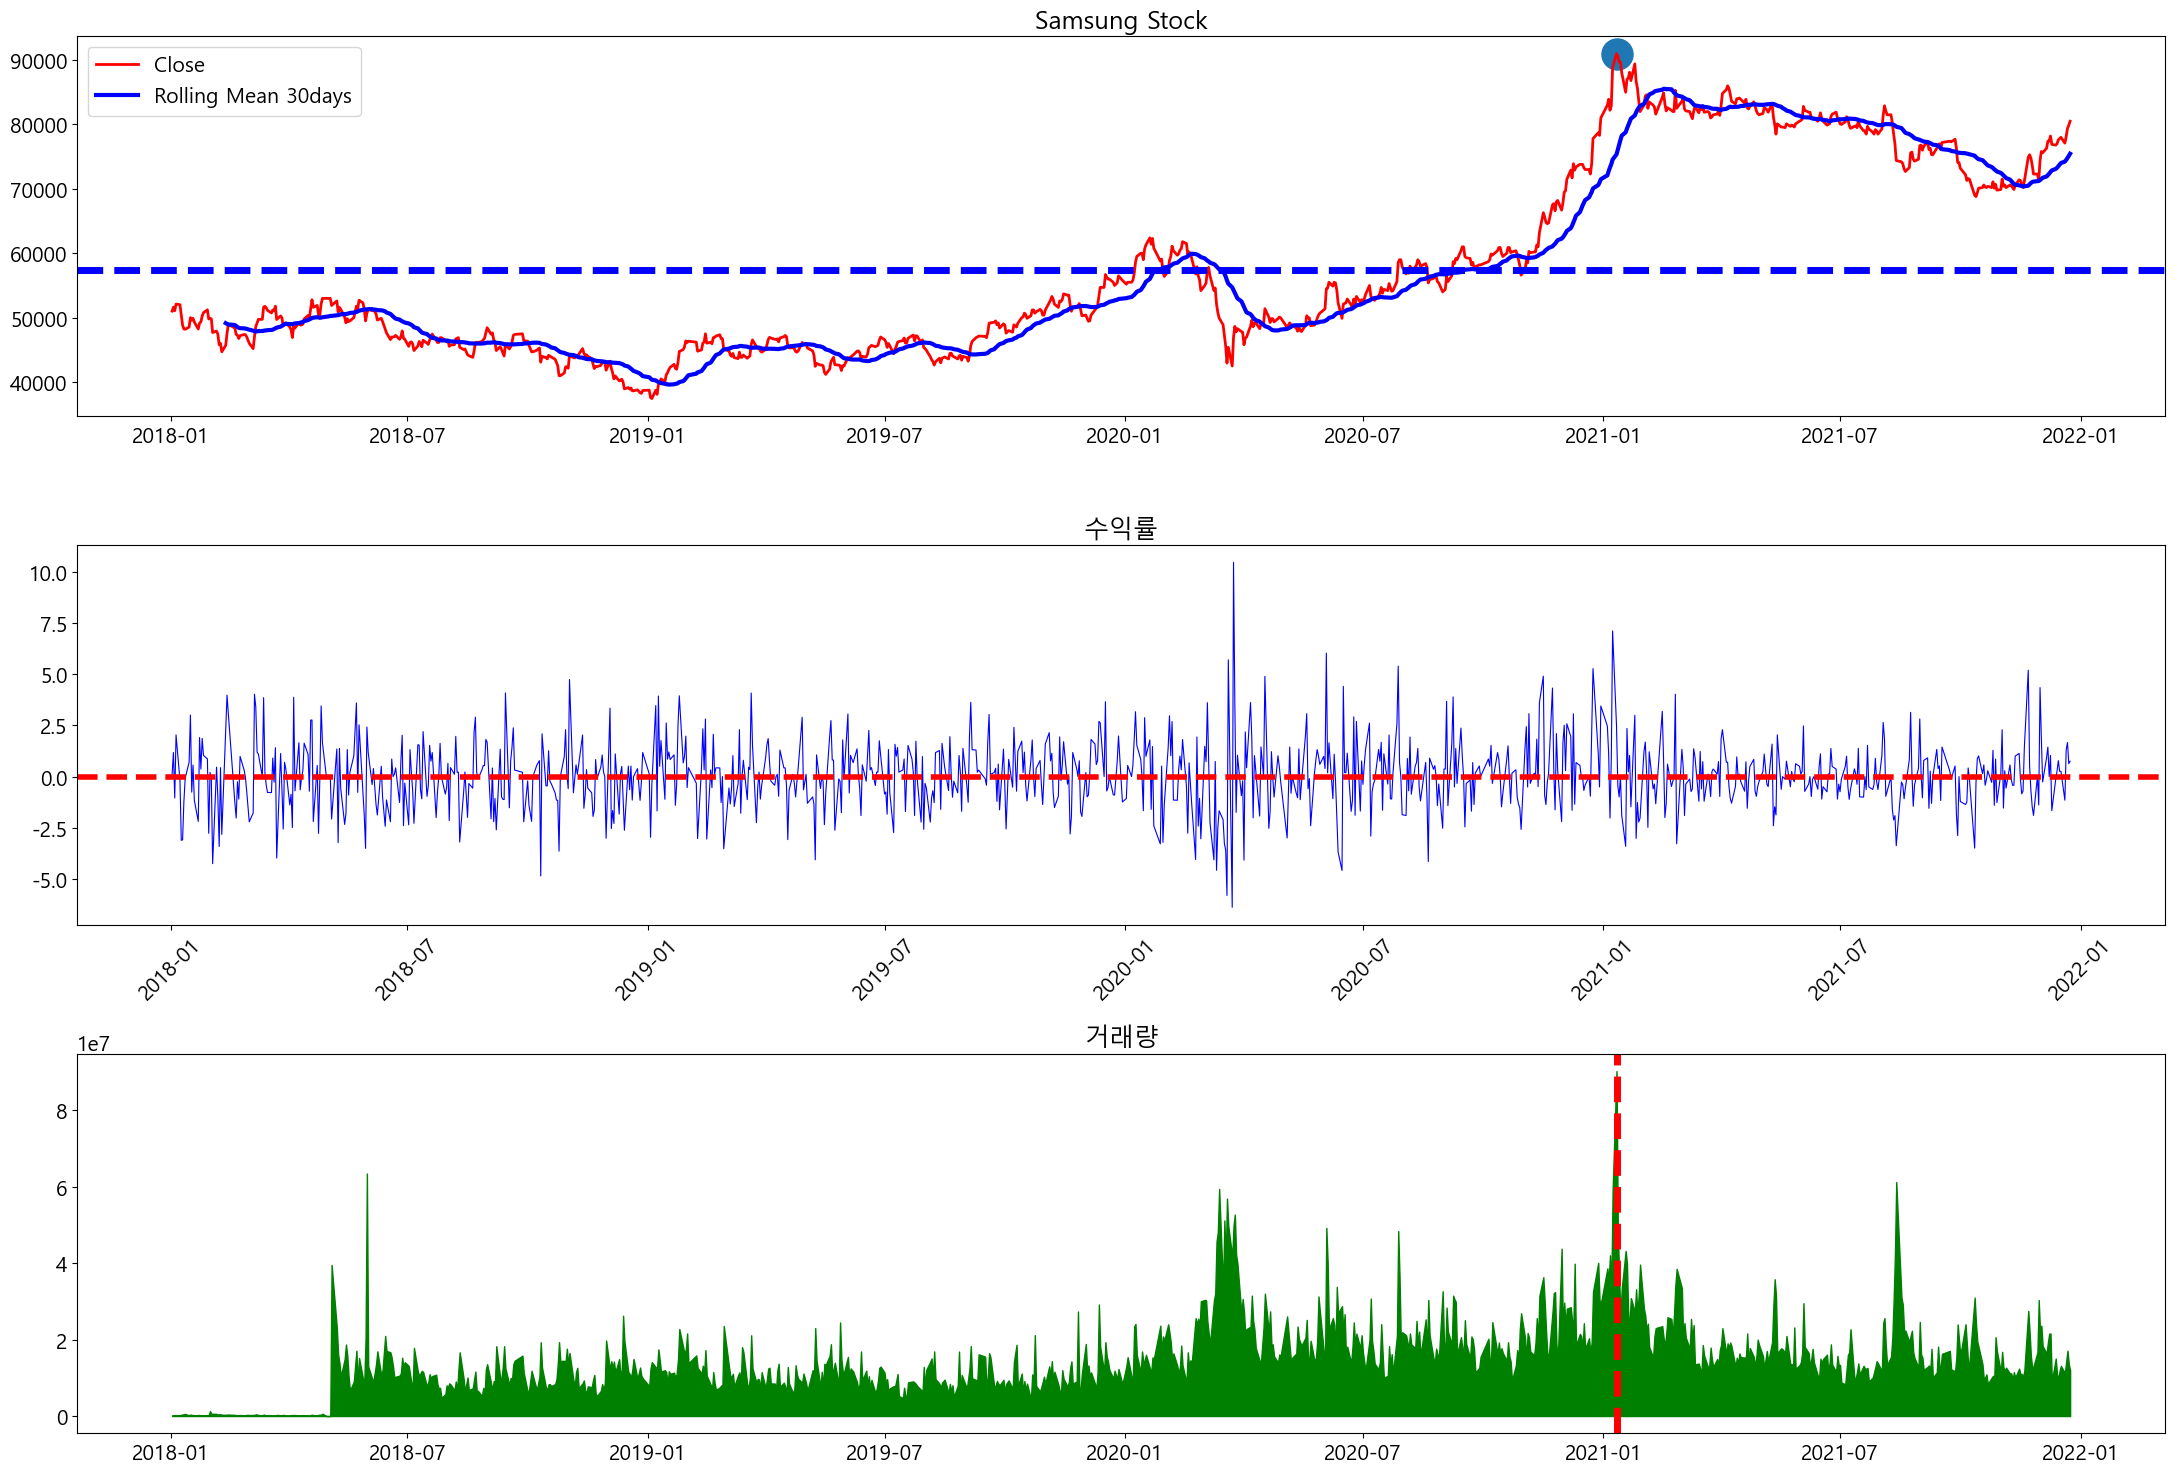

In [104]:
fig,axs = plt.subplots(3,1, sharex= False)

axs[0].plot(df['Close'],color = 'red', linestyle = '-', linewidth =2)
axs[0].plot(df['Close'].rolling(window=30).mean(),color = 'blue', linewidth = 3)
axs[0].axhline(df['Close'].mean(), color = 'blue', linestyle = '--', linewidth = 5)
axs[0].scatter(df.index[df['Close'].argmax()], df['Close'].max(), s = 500, marker = 'o')
axs[0].set_title('Samsung Stock')
axs[0].legend(['Close', 'Rolling Mean 30days'])


axs[1].plot(df['Change']*100,color = 'blue', linestyle = '-', linewidth = 0.8)
axs[1].axhline(0,color = 'red', linestyle = '--', linewidth = 4)
axs[1].tick_params(axis ='x', labelrotation = 45)
axs[1].set_title('수익률')

axs[2].fill_between(df.index,df['Volume'],color = 'green', alpha = 1)
axs[2].set_title('거래량')
axs[2].axvline(df.index[df['Volume'].argmax()], color = 'red', linewidth = 5, linestyle ='--')


plt.tight_layout()
plt.show()

## 참고 라이브러리
- https://seaborn.pydata.org/
- https://plotly.com/python/
